### Dataset Split

In [31]:
import pandas as pd
from src import constants
import csv

In [18]:
import os

In [19]:
os.chdir('../')

In [14]:
train_df = pd.read_csv('../dataset/train.csv')
test_df = pd.read_csv('../dataset/test.csv')




### Image Preprocessing

In [2]:
import cv2
import os
import matplotlib.pyplot as plt
import easyocr


In [6]:
reader = easyocr.Reader(['en'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
c:\Users\jatin\anaconda3\Lib\site-packages\easyocr\detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issue

In [3]:
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    resized_img = cv2.resize(gray,(500,500))
    return resized_img

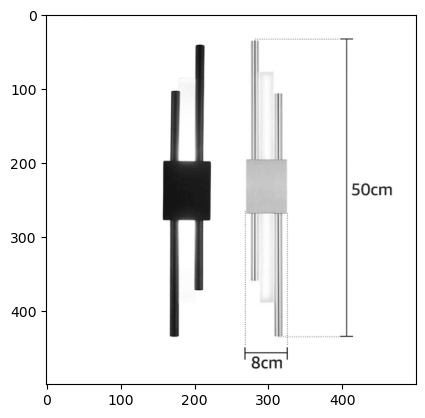

In [4]:
path = r'D:\Dataset\New\images\41ygXRvf8lL.jpg'
imaged= preprocess_image(path)
plt.imshow(imaged,cmap='gray')
plt.show()

In [7]:
result = reader.readtext(imaged)
print(result)

[([[410, 224], [470, 224], [470, 250], [410, 250]], 'S0cm', 0.30929964780807495), ([[274, 458], [322, 458], [322, 484], [274, 484]], '8cm', 0.9998073598684561)]


In [22]:
result[0][1]

'S0cm'

### Extracting Text from images

In [8]:
def extract_text(image_path):
    preprocessed_img = preprocess_image(image_path)
    result = reader.readtext(preprocessed_img)

    extracted_text = " ".join([text[1] for text in result])
    return extracted_text


In [23]:
text = extract_text(path)
print(f"Extracted Text : {text}")
print(type(text))

Extracted Text : S0cm 8cm
<class 'str'>


### Correction of OCR text

In [25]:
ocr_correction_map= {"S":"5", "O":"0"}
def correct_ocr_errors(text):
    corrected_text = []
    for char in text:
        if char in ocr_correction_map:
            corrected_text.append(ocr_correction_map[char])
        else:
            corrected_text.append(char)
    return ''.join(corrected_text)

### Unit abbreviation mapping


In [26]:

unit_abbreviation_mapping = {
    "cm": "centimetre",
    "centimeter": "centimetre",
    "mm": "millimetre",
    "millimeter": "millimetre",
    "kg": "kilogram",
    "kilogramme": "kilogram",
    "g": "gram",
    "gm": "gram",
    "gramme": "gram",
    "ml": "millilitre",
    "milliliter": "millilitre",
    "l": "litre",
    "lt": "litre",
    "m": "metre",
    "meter": "metre",
    "kv": "kilovolt",
    "v":"volt",
    "kw": "kilowatt",
    "w":"watt",
    "oz": "ounce",
    "ft": "foot",
    "foot": "foot",
    "in": "inch",
    "inch": "inch",

}

In [27]:
def map_abbreviation_to_unit(unit):
    unit = unit.lower()
    return unit_abbreviation_mapping.get(unit,unit)


### Mapping extracted text to entity values

In [28]:
import re

def map_extracted_text_to_values(extracted_text):
    extracted_text = correct_ocr_errors(extracted_text)
    pattern = r"(\d+(?:\.\d+)?)\s*(\w+)"
    matches = re.findall(pattern, extracted_text)

    mapped_values = []
    for value,unit in matches:
        full_unit = map_abbreviation_to_unit(unit)
        if full_unit in constants.allowed_units:
            mapped_values.append(f"{float(value)} {full_unit}")
    return mapped_values

In [30]:
txt = extract_text(path)
entity_value = map_extracted_text_to_values(txt)
print(entity_value)

['50.0 centimetre', '8.0 centimetre']


### Generating output in csv format

In [35]:
def generate_output_csv(images_folder,output_csv):
    image_files = os.listdir(images_folder)
    print(f"found {len(image_files)} image file")
    with open(output_csv,mode ='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['index','prediction'])

        for idx,image_file in enumerate(image_files):
            image_path = os.path.join(images_folder, image_file)
            print(f"Processing file {idx+1}/{len(image_files)}: {image_file}")
            extracted_text = extract_text(image_path)
            mapped_val = map_extracted_text_to_values(extracted_text)
        prediction = " ".join(mapped_val) if mapped_val else "0.0 unknown"
        writer.writerow([idx,prediction]) 
    print(f"output csv saved as {output_csv}")

    

In [36]:
images_fold = 'images'

output = 'test_out.csv'
generate_output_csv(images_fold,output)

found 54 image file
Processing file 1/54: 41-NCxNuBxL.jpg
Processing file 2/54: 417NJrPEk+L.jpg
Processing file 3/54: 417SThj+SrL.jpg
Processing file 4/54: 41ADVPQgZOL.jpg
Processing file 5/54: 41nblnEkJ3L.jpg
Processing file 6/54: 41o3iis9E7L.jpg
Processing file 7/54: 41pvwR9GbaL.jpg
Processing file 8/54: 41uwo4PVnuL.jpg
Processing file 9/54: 41ygXRvf8lL.jpg
Processing file 10/54: 41zgjN+zW3L.jpg
Processing file 11/54: 51+oHGvSvuL.jpg
Processing file 12/54: 51-WIOx5pxL.jpg
Processing file 13/54: 510xYFNYQ8L.jpg
Processing file 14/54: 514bY8c4ZIL.jpg
Processing file 15/54: 514pScQdlCL.jpg
Processing file 16/54: 51BEuVR4ZzL.jpg
Processing file 17/54: 51bEy0J5wLL.jpg
Processing file 18/54: 51cPZYLk2YL.jpg
Processing file 19/54: 51EBBqNOJ1L.jpg
Processing file 20/54: 51fAzxNm+cL.jpg
Processing file 21/54: 51FSlaVlejL.jpg
Processing file 22/54: 51H+mX2Wk7L.jpg
Processing file 23/54: 51jTe522S2L.jpg
Processing file 24/54: 51kdBAv6ImL.jpg
Processing file 25/54: 51KykmLgc0L.jpg
Processing fil

### Prediction